In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os, sys, re
from tqdm.notebook import tqdm

In [2]:
regex= re.compile(r'\d+')

In [3]:
data_folder = os.path.join('/','Users', 'cdesio', 'UoB', 'leakage')

In [4]:
extracted_folder = os.path.join(data_folder, 'extracted')

In [5]:
fnames = os.listdir(extracted_folder)

In [6]:
Temps = []
Tints = []
for fname in fnames:
    split = fname.split('_')
    T = split[0]
    tint = split[1]
    Temps.append(float(T[1:]))
    Tints.append(int(regex.findall(tint)[0]))
    

In [7]:
Temps

[20.0,
 10.0,
 24.8,
 4.9,
 -10.0,
 10.0,
 10.0,
 -20.0,
 -20.0,
 24.8,
 0.1,
 4.9,
 4.9,
 -5.0,
 30.0,
 -5.0,
 20.0,
 20.0,
 -15.0,
 -10.0,
 14.9,
 14.9,
 -10.0,
 30.0,
 -5.0,
 0.1,
 -15.0,
 24.8,
 -20.0,
 10.0,
 30.0,
 4.9,
 20.0,
 4.9,
 -20.0,
 10.0,
 -5.0,
 -20.0,
 -15.0,
 4.9,
 24.8,
 -10.0,
 0.1,
 -5.0,
 14.9,
 -15.0,
 30.0,
 -15.0,
 0.1,
 14.9,
 -15.0,
 20.0,
 20.0,
 -5.0,
 -10.0,
 14.9,
 0.1,
 -20.0,
 30.0,
 -15.0,
 10.0,
 0.1,
 24.8,
 -20.0,
 -5.0,
 -10.0,
 -15.0,
 10.0,
 20.0,
 -15.0,
 -5.0,
 14.9,
 0.1,
 30.0,
 4.9,
 30.0,
 24.8,
 10.0,
 -20.0,
 4.9,
 -20.0,
 10.0,
 0.1,
 -20.0,
 -10.0,
 10.0,
 20.0,
 30.0,
 24.8,
 10.0,
 0.1,
 14.9,
 0.1,
 -5.0,
 4.9,
 -20.0,
 -15.0,
 0.1,
 24.8,
 -20.0,
 -10.0,
 -5.0,
 10.0,
 0.1,
 20.0,
 30.0,
 30.0,
 -10.0,
 0.1,
 0.1,
 -10.0,
 14.9,
 14.9,
 20.0,
 -20.0,
 4.9,
 -15.0,
 -5.0,
 14.9,
 10.0,
 -10.0,
 4.9,
 20.0,
 10.0,
 24.8,
 24.8,
 4.9,
 4.9,
 0.1]

In [8]:
Tints

[6663072,
 4558944,
 10871328,
 3857568,
 15780960,
 7364448,
 2454816,
 26301600,
 5260320,
 5260320,
 15780960,
 6663072,
 15780960,
 1753440,
 11572704,
 8767200,
 10871328,
 3857568,
 5260320,
 1753440,
 10871328,
 5260320,
 8767200,
 5260320,
 26301600,
 5260320,
 26301600,
 1753440,
 13676832,
 3857568,
 10871328,
 2454816,
 11572704,
 7364448,
 1753440,
 10169952,
 21391968,
 8767200,
 21391968,
 10169952,
 8767200,
 31912608,
 31912608,
 11572704,
 11572704,
 11572704,
 1753440,
 8767200,
 1753440,
 1753440,
 13676832,
 2454816,
 7364448,
 13676832,
 5260320,
 8767200,
 8767200,
 21391968,
 8767200,
 1753440,
 6663072,
 10169952,
 11572704,
 11572704,
 5260320,
 10169952,
 3857568,
 9468576,
 5260320,
 15780960,
 15780960,
 3857568,
 3857568,
 3857568,
 10871328,
 10169952,
 6663072,
 10871328,
 33315360,
 5260320,
 15780960,
 8767200,
 26301600,
 3857568,
 26301600,
 1753440,
 52603224,
 6663702,
 3857568,
 3156192,
 10871328,
 6663072,
 6663072,
 31912608,
 13676832,
 3506880

In [9]:
def sel_files(flist, ts=None):
    selected = []
    if len(ts)>0:
        for t in ts:
            for f in flist:
                if str(t) in f:
                    selected.append(f)
    return sorted(selected)

In [10]:
file_list = set(sel_files(fnames, ts = np.unique(Tints)))-set([])

In [11]:
def ravel_nested(ax):
    return np.vstack(ax).reshape(20, 400)

mean_pix_by_pix = np.empty((129,20))
std_pix_by_pix = np.empty((129,20))
temps = np.zeros((129,20))
tints = np.zeros((129,20))
for i,f in tqdm(enumerate(file_list), desc='file'):
    temps[i] = np.tile(np.float(f.split('_')[0][1:]),20)
    tints[i] = np.tile(int(regex.findall(f.split('_')[1])[0]),20)
    imported = np.load(os.path.join(extracted_folder,f), allow_pickle=True)['pixels']
    stacked = np.apply_along_axis(ravel_nested, 1, imported)
    mean_pix_by_pix[i]= np.mean(np.mean(stacked, axis=0), axis=1)
    std_pix_by_pix[i]= np.mean(np.std(stacked, axis=0), axis=1)

In [12]:
rad_dam = np.array([50, 45, 40, 35, 30, 20, 18, 16, 14, 12, 10, 9, 8, 25, 6, 5, 4, 3, 2, 1])

In [13]:
rad_dam = np.tile(rad_dam, 129).reshape(129, 20)

In [14]:
rad_dam

array([[50, 45, 40, ...,  3,  2,  1],
       [50, 45, 40, ...,  3,  2,  1],
       [50, 45, 40, ...,  3,  2,  1],
       ...,
       [50, 45, 40, ...,  3,  2,  1],
       [50, 45, 40, ...,  3,  2,  1],
       [50, 45, 40, ...,  3,  2,  1]])

In [15]:
df = pd.DataFrame({"T":temps.ravel(), "tint":tints.ravel(), 'rad_dam':rad_dam.ravel(), 
                   'pedestal': mean_pix_by_pix.ravel(), 'noise':std_pix_by_pix.ravel()})

In [16]:
df.head(n=3)

,T,tint,rad_dam,pedestal,noise
0,24.8,3857568.0,50,16240.799812,10.086398
1,24.8,3857568.0,45,16211.463025,12.166218
2,24.8,3857568.0,40,16202.940263,12.768441


mean_pix_by_pix = np.zeros((129,200, 20, 400))
rad_dam = [50, 45, 40, 35, 30, 20, 18, 16, 14, 12, 10, 9, 8, 25, 6, 5, 4, 3, 2, 1]
for i,f in tqdm(enumerate(file_list), desc='file'):
    #print(f)
    te = np.float(f.split('_')[0][1:])
    tint = int(regex.findall(f.split('_')[1])[0])
    imported = np.load(os.path.join(extracted_folder,f), allow_pickle=True)['pixels']
    
    for fn, f in enumerate(imported):
        iter_rad_dam = iter(rad_dam)
        
        for j, r in enumerate(f):
            mean_pix_by_pix[i,fn,j]=np.ravel(r)
            label=next(iter_rad_dam)
            #print(test.shape)
            #pixels[i, j] = (label, te, tint, np.mean(np.mean(test, axis=0), axis=1), np.mean(np.std(test, axis=0), axis=1))

In [17]:
ttints = []
Temps = []
rads = []
intensities = []
errors = []
for (T,r,t), group in df[(df['rad_dam']<15) & (df['T'].isin([-20.0, -10.0, 0.1, 10.0, 14.9]))].groupby(['T', 'rad_dam', 'tint']):
    #print(T,r,t,float(group['noise']), float(group['pedestal']))
    Temps.append(T)
    ttints.append(t)
    rads.append(r)
    intensities.append(float(group['pedestal']))
    errors.append(float(group['noise']))

In [18]:
ttints = np.array(ttints)
Temps = np.array(Temps)
rads = np.array(rads)
intensities = np.array(intensities)
errors = np.array(errors)

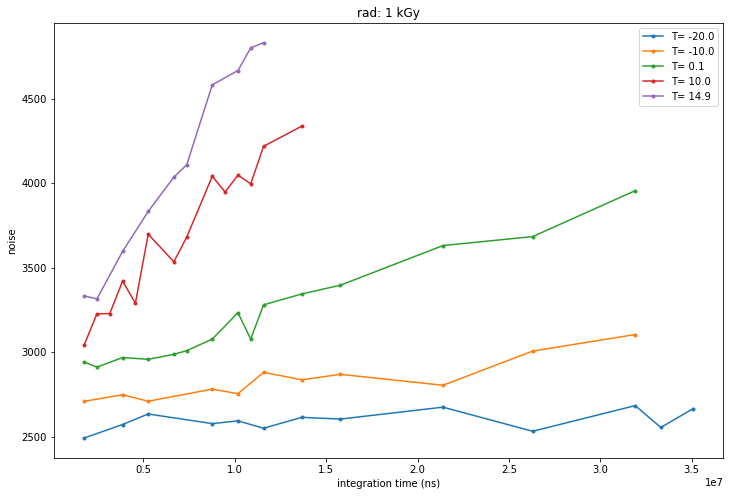

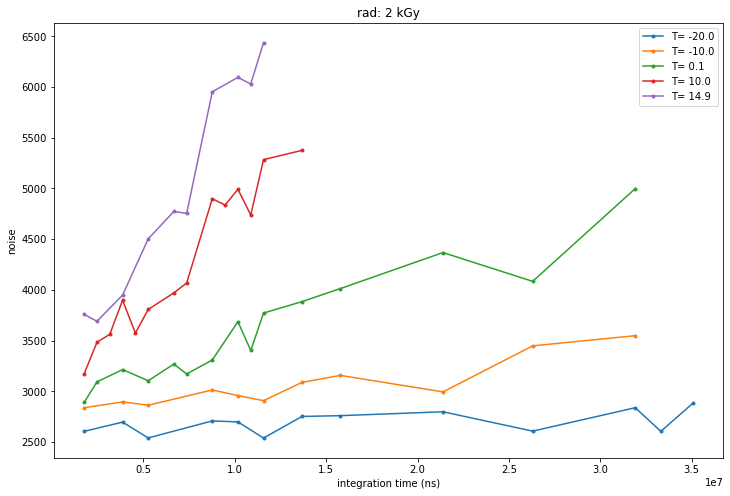

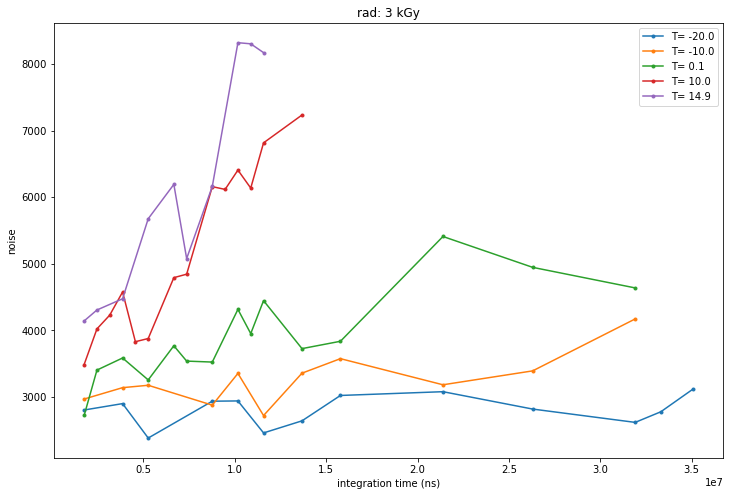

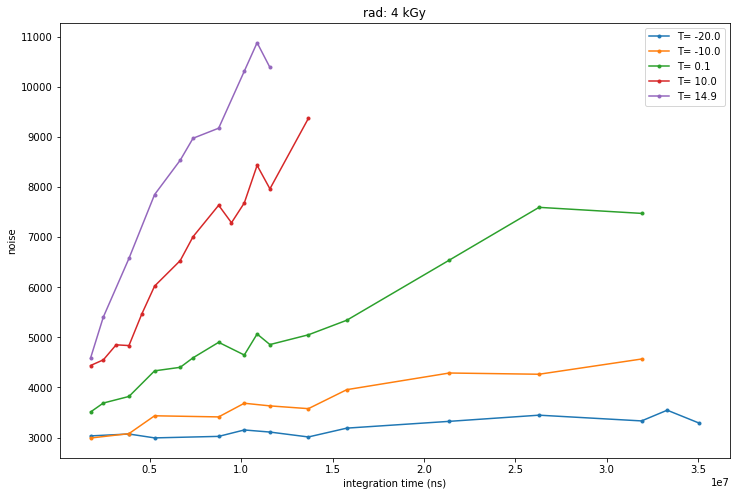

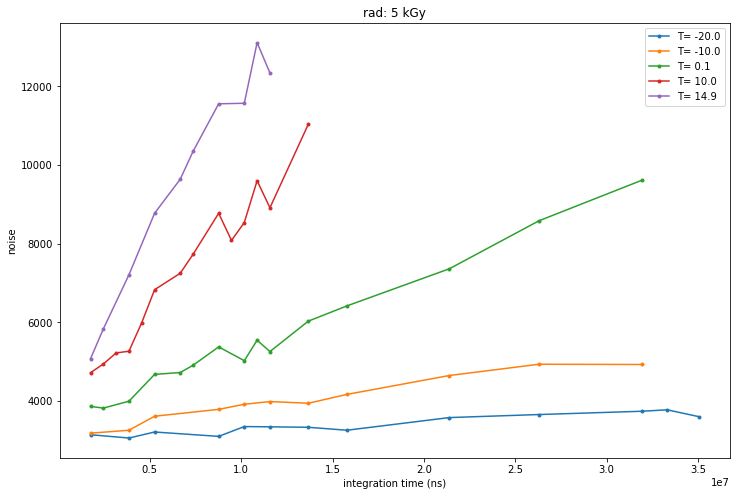

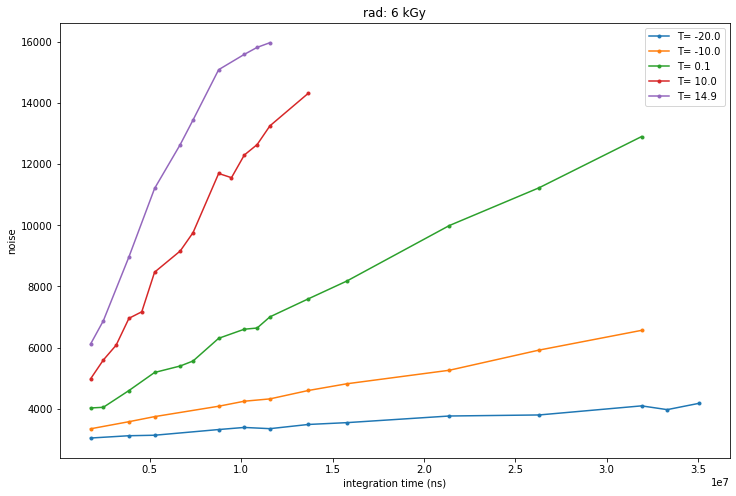

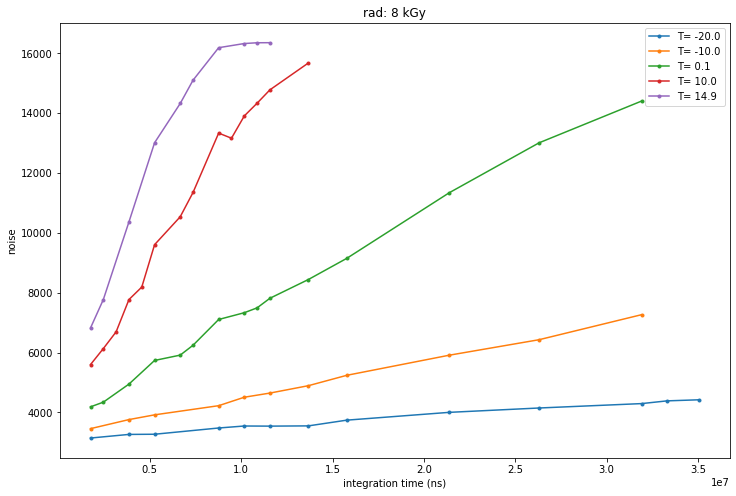

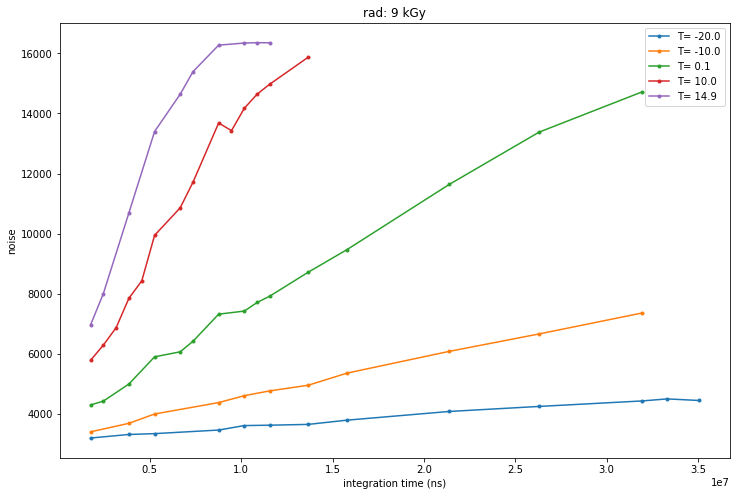

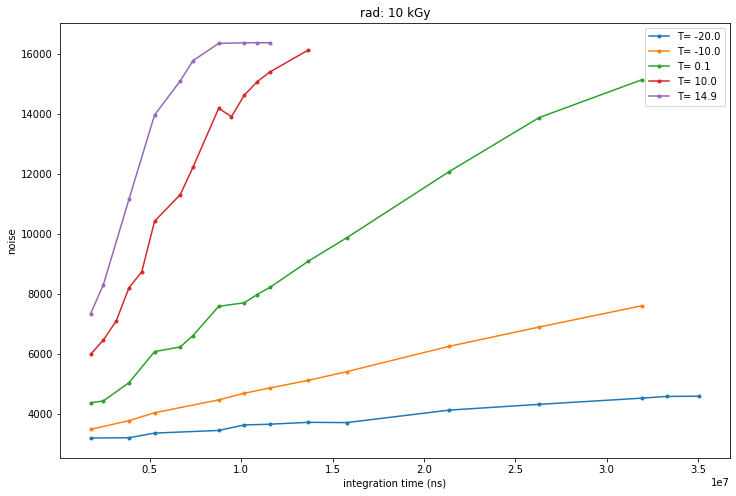

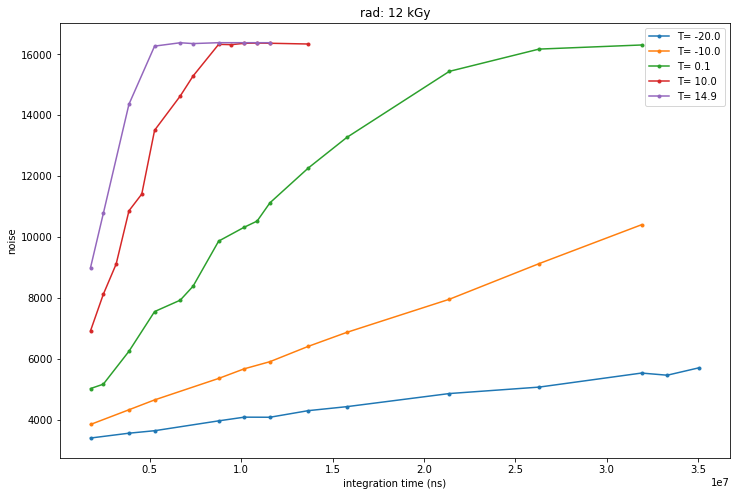

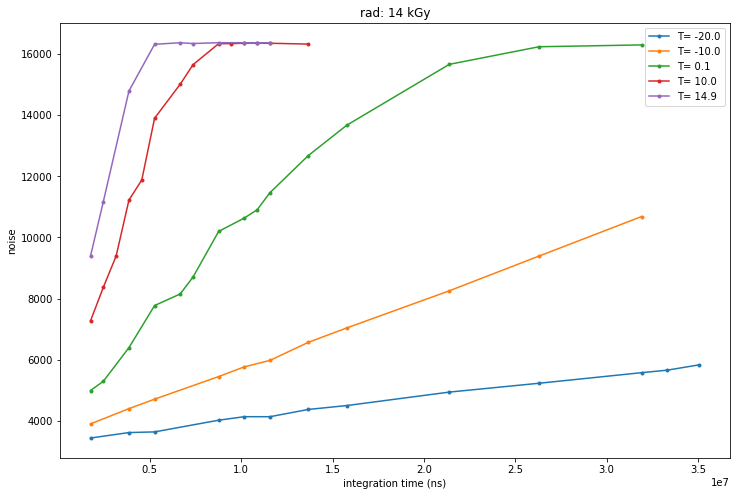

In [19]:
for r in np.unique(rads):
    plt.figure(figsize=(12,8))
    for t in np.unique(Temps):
        plt.plot(ttints[np.argwhere(rads==r).ravel()][np.where(Temps[np.argwhere(rads==r).ravel()]==t)[0]], 
                 intensities[np.argwhere(rads==r).ravel()][np.where(Temps[np.argwhere(rads==r).ravel()]==t)[0]],
                 'o-',markersize=3,
                label = 'T= {}'.format(t))
        plt.title('rad: {} kGy'.format(r))
        plt.xlabel('integration time (ns)')
        plt.ylabel('noise')
#         plt.ylim(0,3500)
    plt.legend(loc='upper right')
    plt.show()

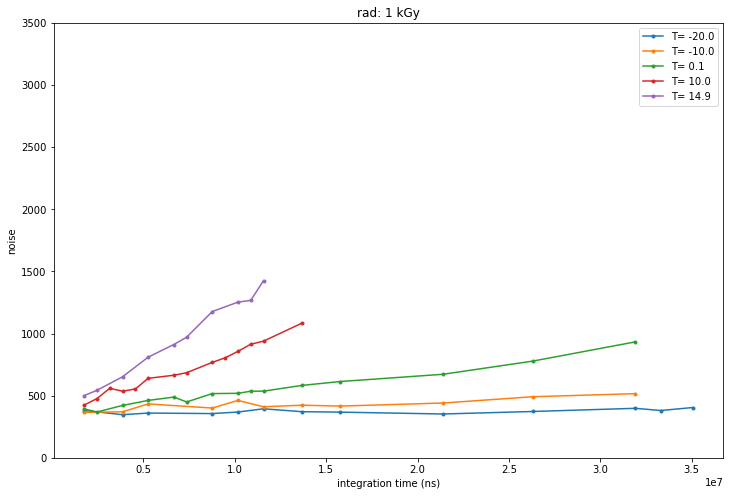

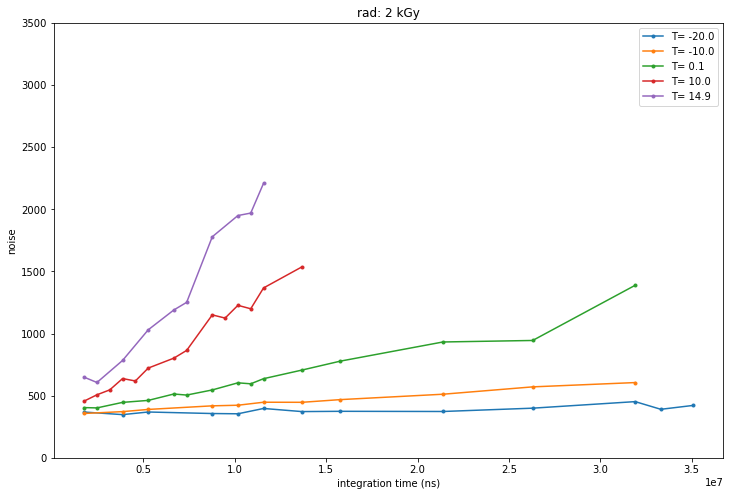

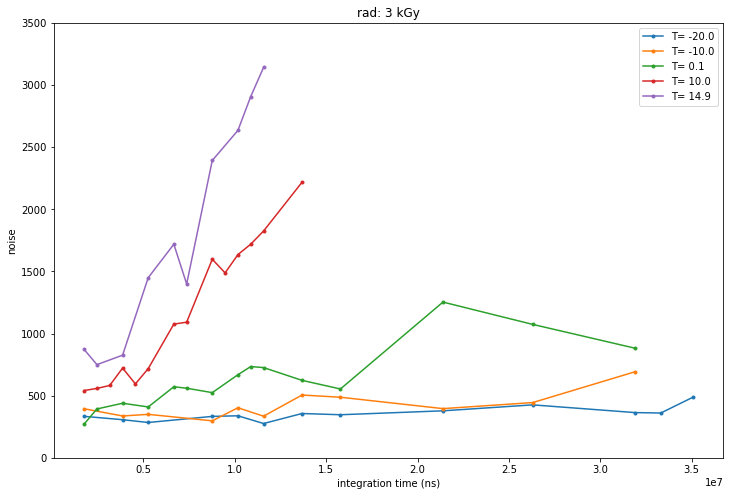

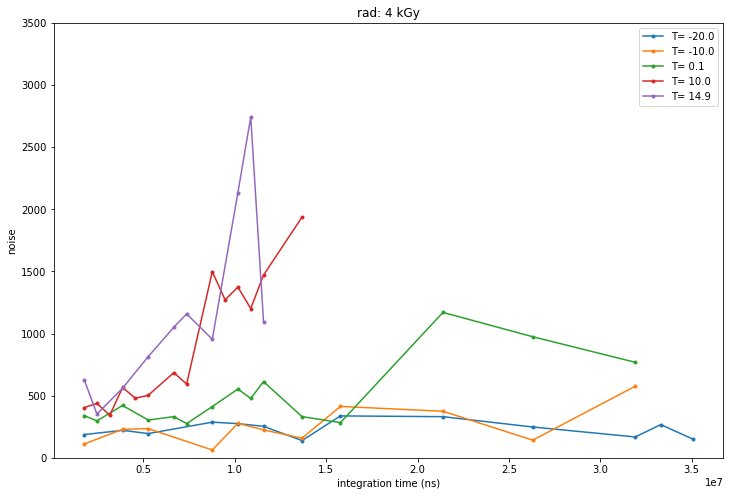

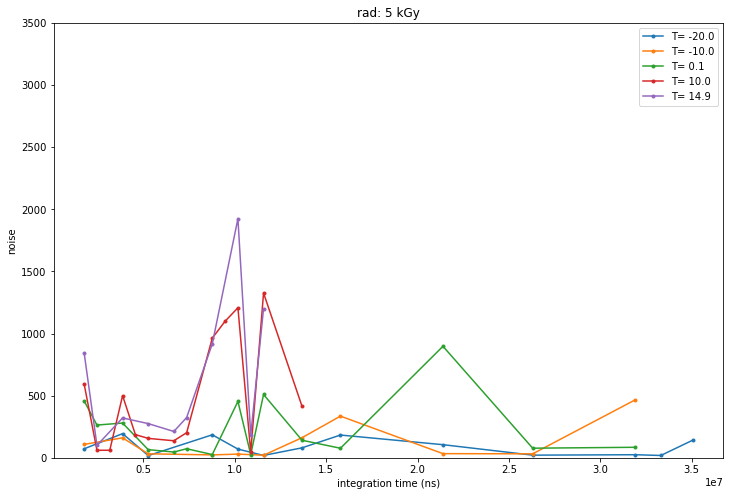

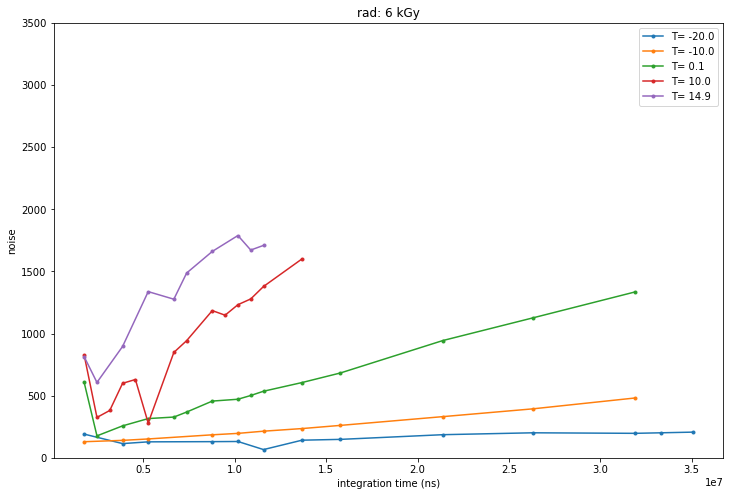

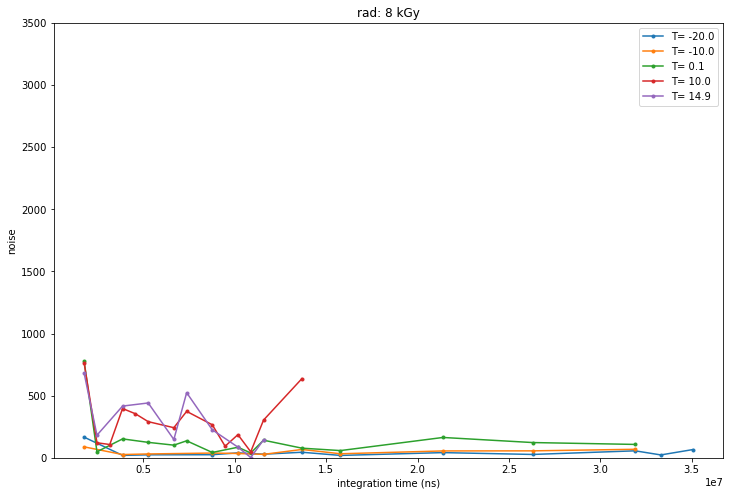

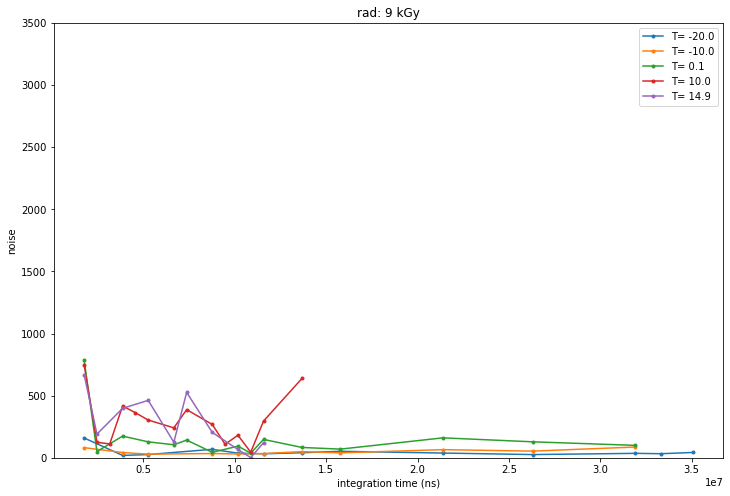

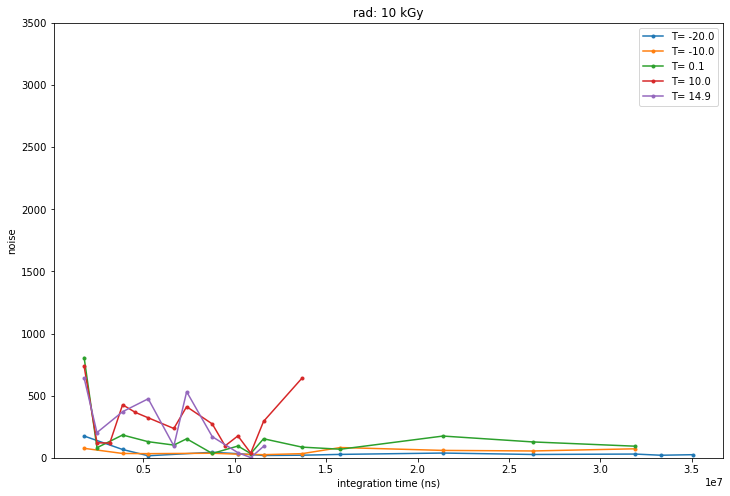

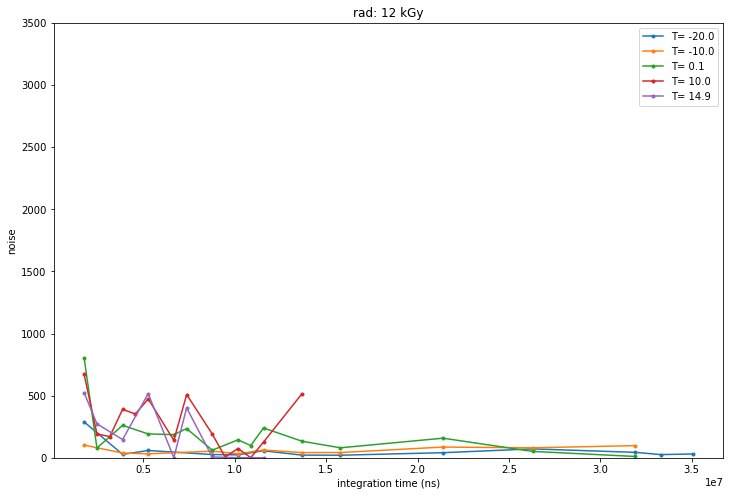

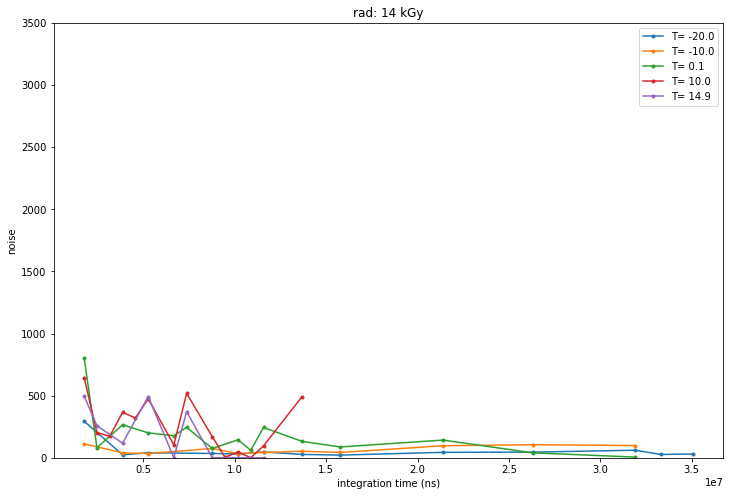

In [439]:
for r in np.unique(rads):
    plt.figure(figsize=(12,8))
    for t in np.unique(Temps):
        plt.plot(ttints[np.argwhere(rads==r).ravel()][np.where(Temps[np.argwhere(rads==r).ravel()]==t)[0]], 
                 errors[np.argwhere(rads==r).ravel()][np.where(Temps[np.argwhere(rads==r).ravel()]==t)[0]],
                 'o-',markersize=3,
                label = 'T= {}'.format(t))
        plt.title('rad: {} kGy'.format(r))
        plt.xlabel('integration time (ns)')
        plt.ylabel('noise')
        plt.ylim(0,3500)
    plt.legend(loc='upper right')
    plt.show()
    #plt.savefig('noise_vs_tint_5_temperatures_{}kGy.png'.format(r))

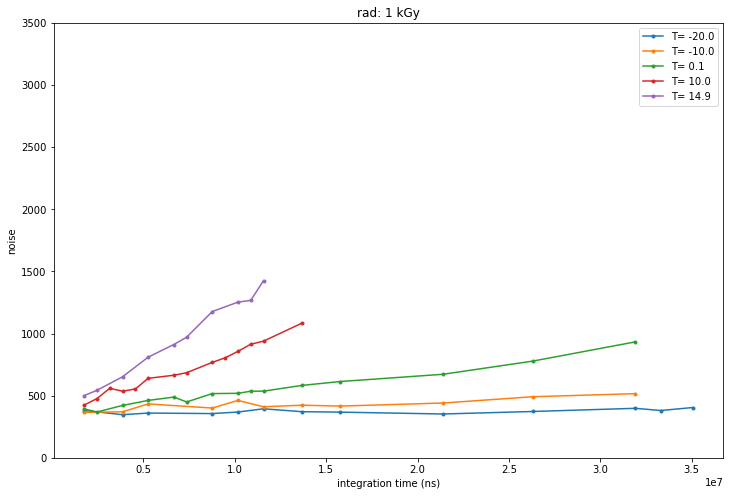

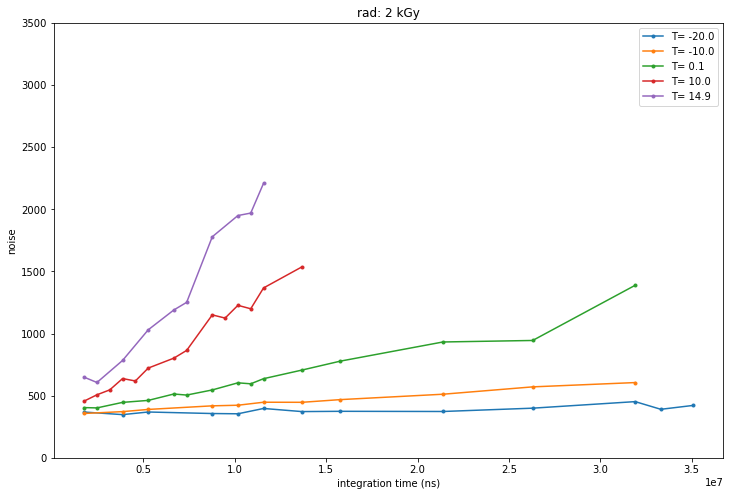

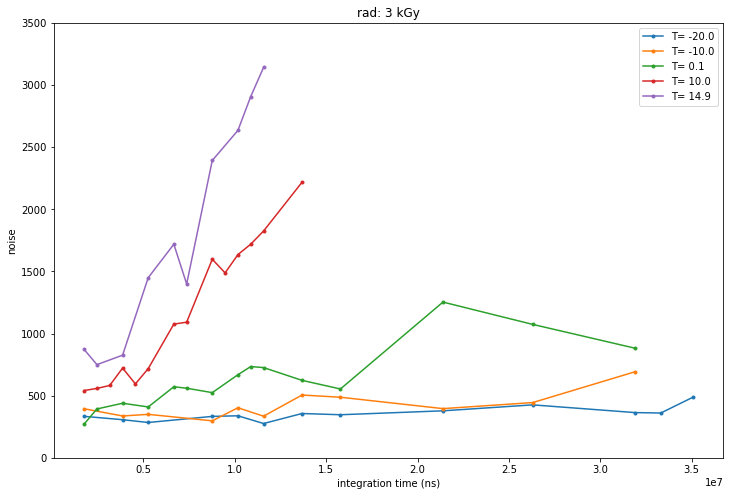

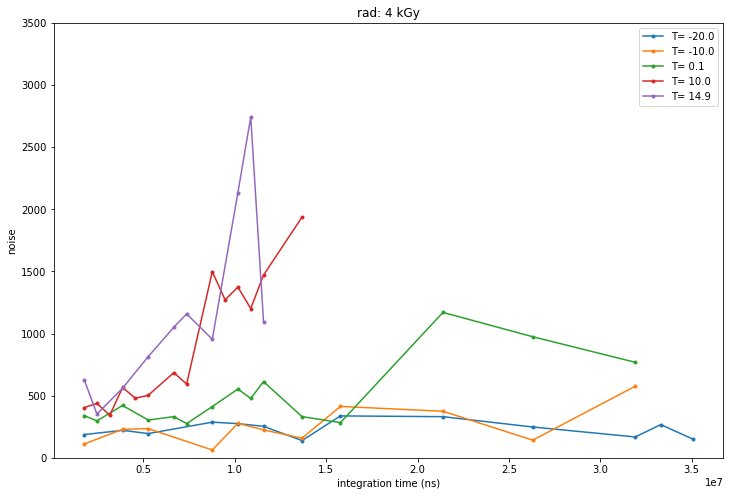

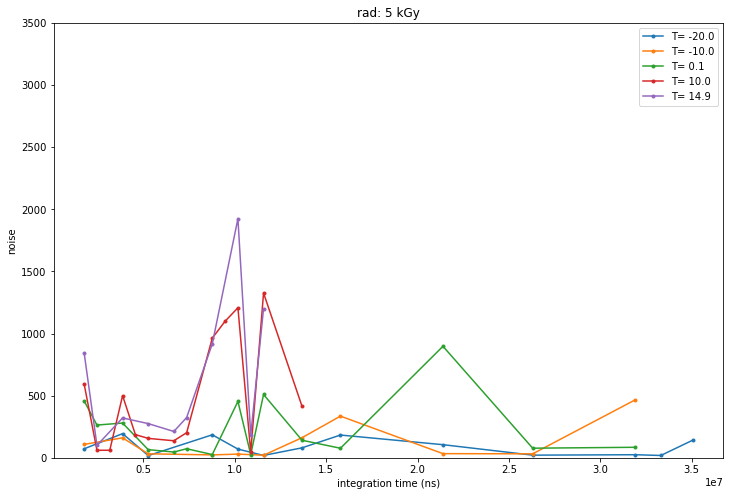

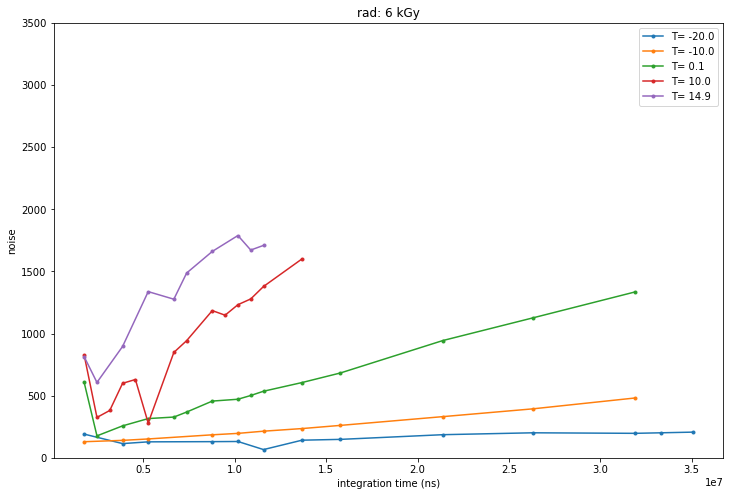

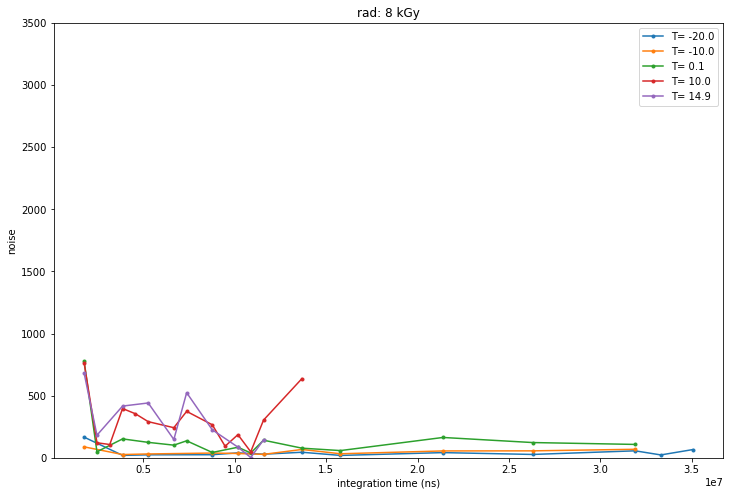

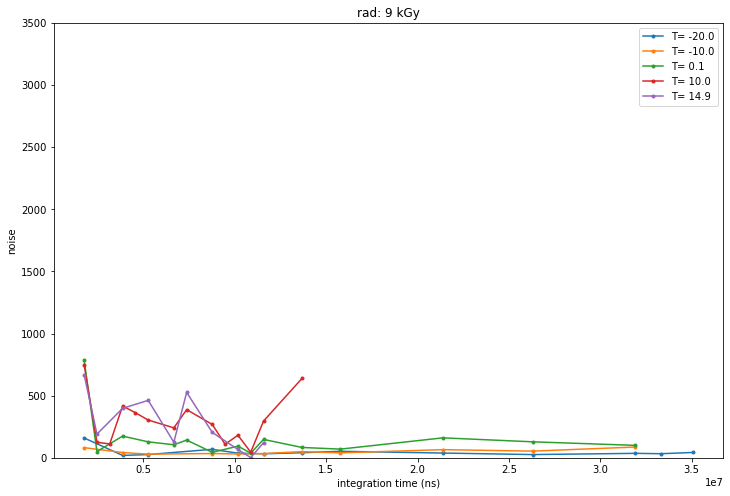

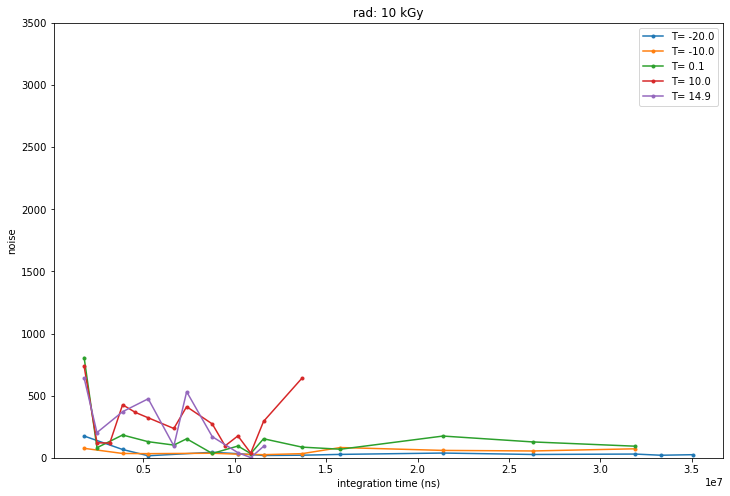

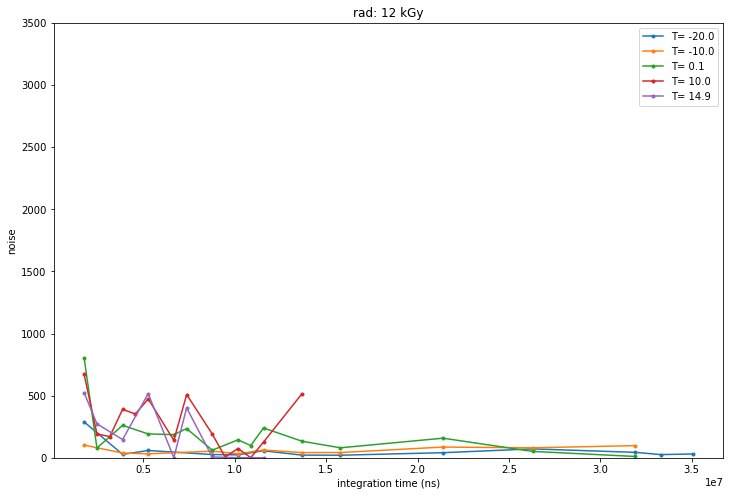

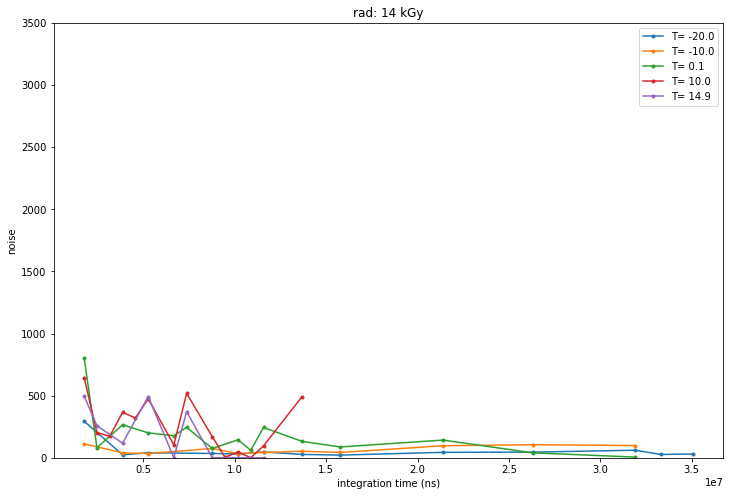

In [239]:
for r in np.unique(rads):
    plt.figure(figsize=(12,8))
    for t in np.unique(Temps):
        
        plt.plot(tints[np.argwhere(rads==r)][np.where(Temps[np.argwhere(rads==r)]==t)[0]], 
                 errors[np.argwhere(rads==r)][np.where(Temps[np.argwhere(rads==r)]==t)[0]],
                 'o-',markersize=3,
                label = 'T= {}'.format(t))
        plt.title('rad: {} kGy'.format(r))
        plt.xlabel('integration time (ns)')
        plt.ylabel('noise')
        plt.ylim(0,3500)
    plt.legend(loc='upper right')
    #plt.show()
    #plt.savefig('noise_vs_tint_5_temperatures_{}kGy.png'.format(r))

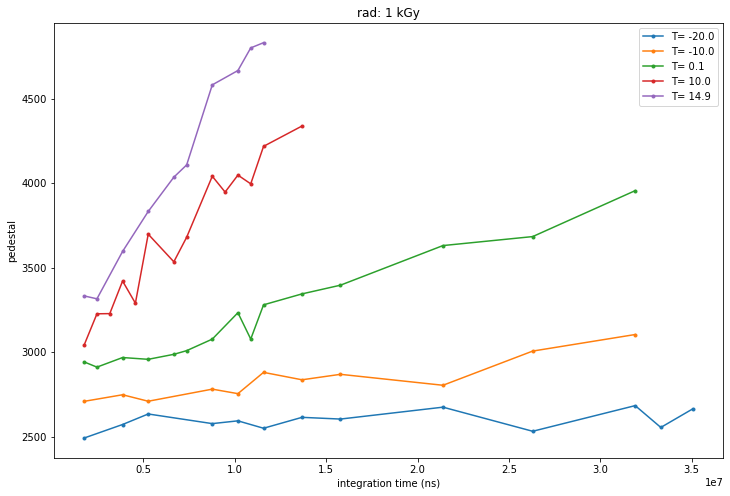

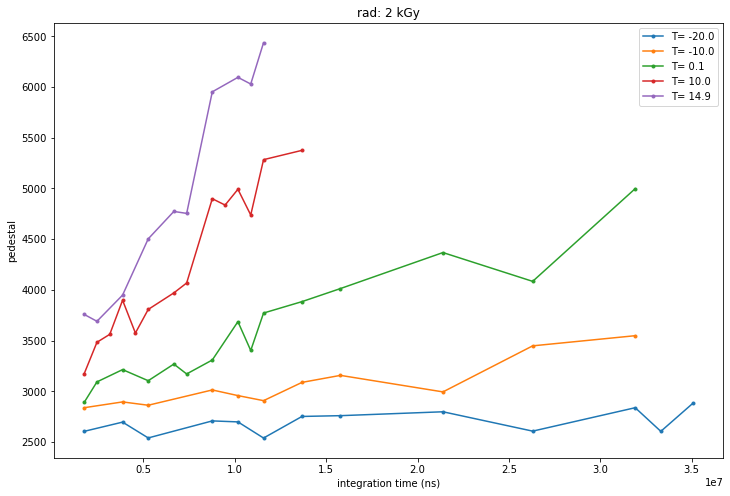

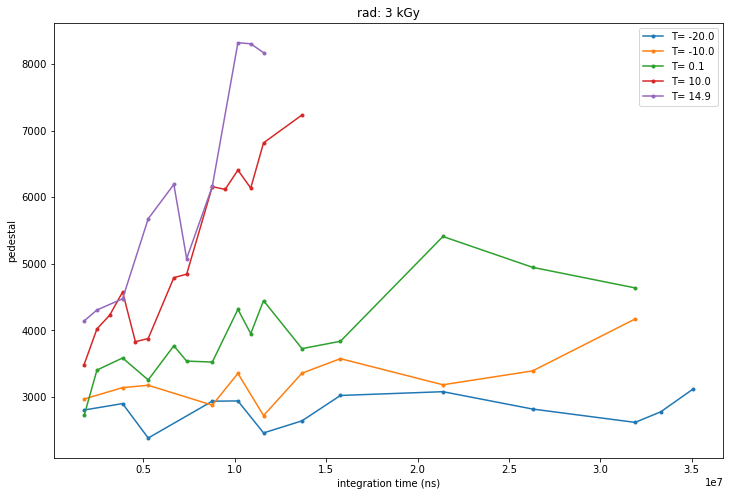

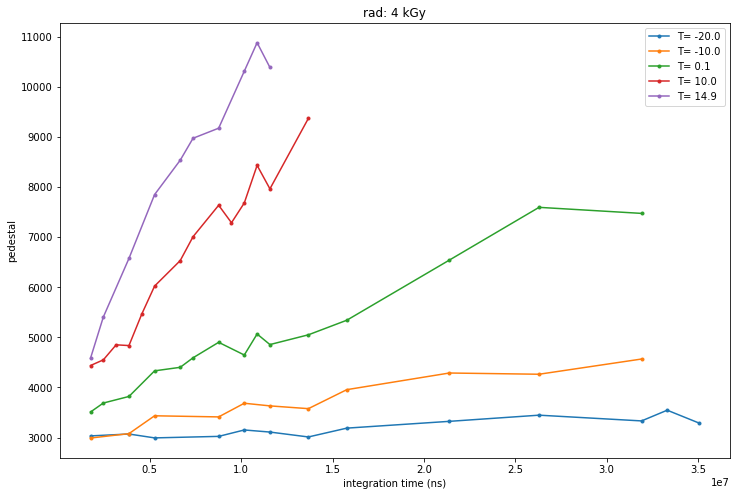

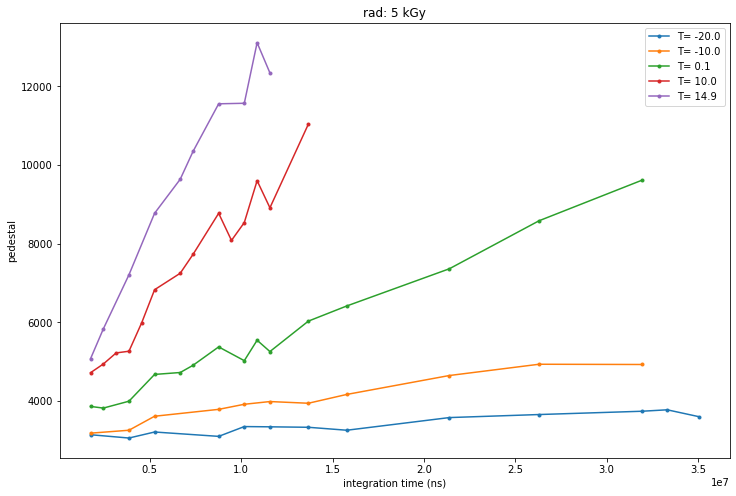

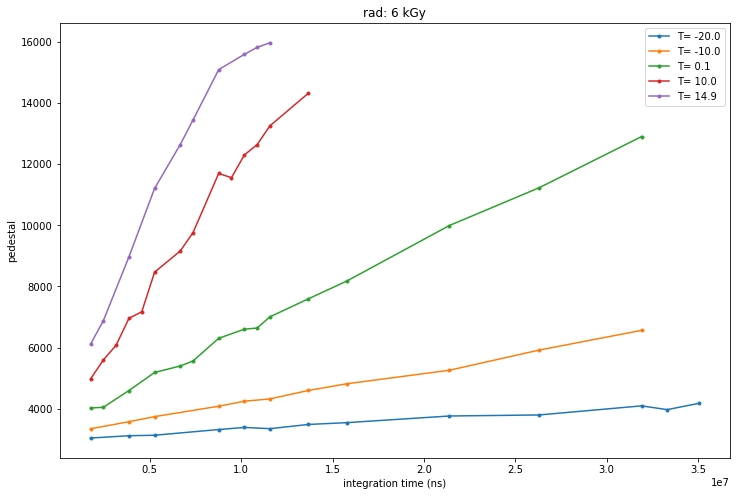

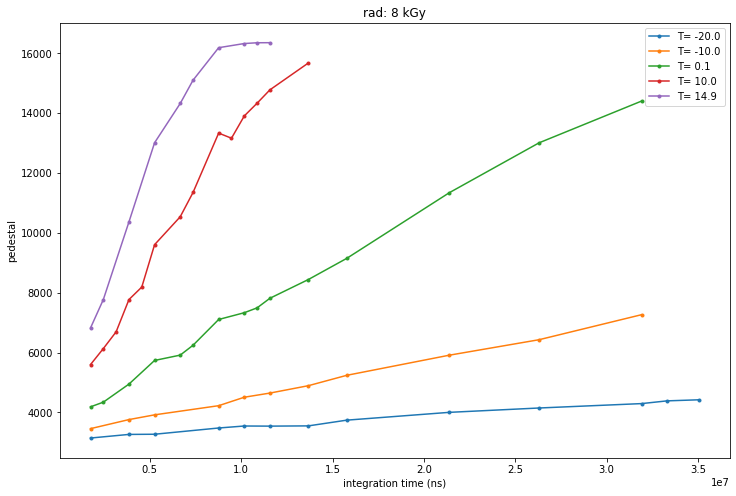

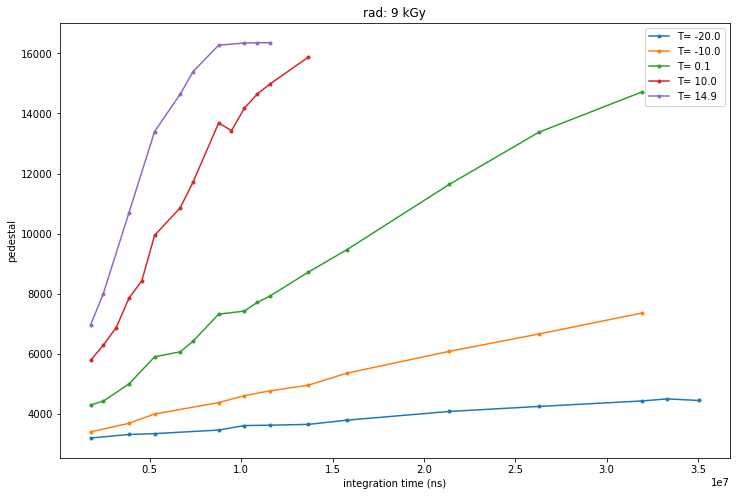

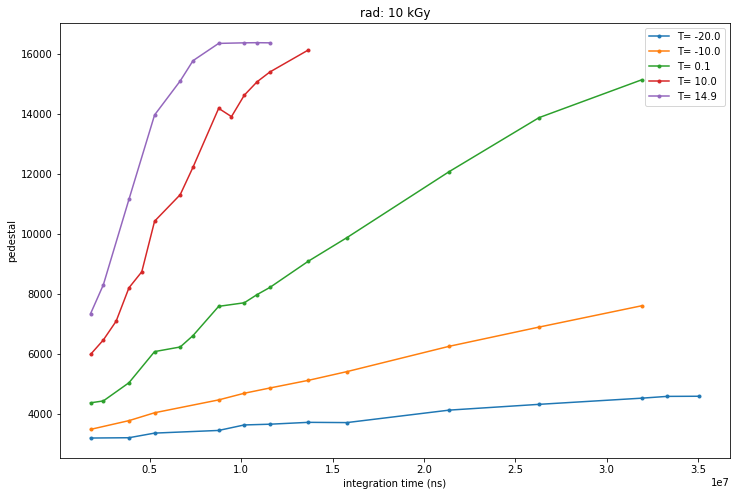

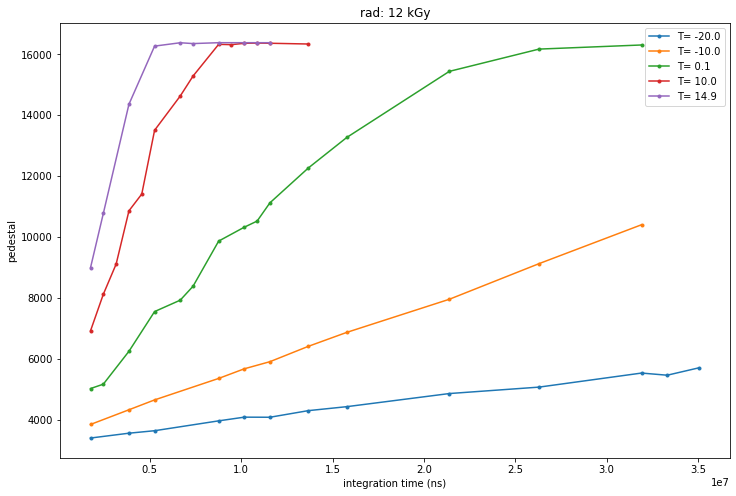

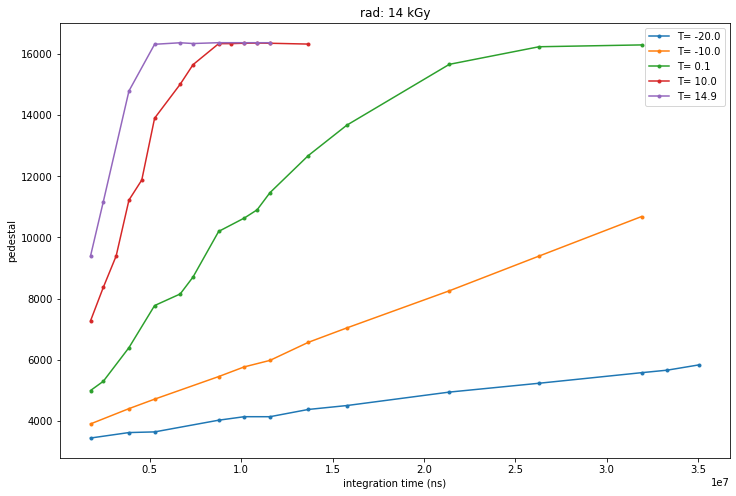

In [225]:
for r in np.unique(rads):
    plt.figure(figsize=(12,8))
    for t in np.unique(Temps):
        
        plt.plot(tints[np.argwhere(rads==r)][np.where(Temps[np.argwhere(rads==r)]==t)[0]], 
                 intensities[np.argwhere(rads==r)][np.where(Temps[np.argwhere(rads==r)]==t)[0]],
                 'o-',markersize=3,
                label = 'T= {}'.format(t))
        plt.title('rad: {} kGy'.format(r))
        plt.xlabel('integration time (ns)')
        plt.ylabel('pedestal')
        #plt.ylim(0,3500)
    plt.legend(loc='upper right')
    plt.show()

/Users/cdesio/opt/anaconda3/envs/pyroot/lib/python3.6/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Support for passing a (n, 1)-shaped error array to errorbar() is deprecated since Matplotlib 3.1 and will be removed in 3.3; pass a 1D array instead.
  if __name__ == '__main__':


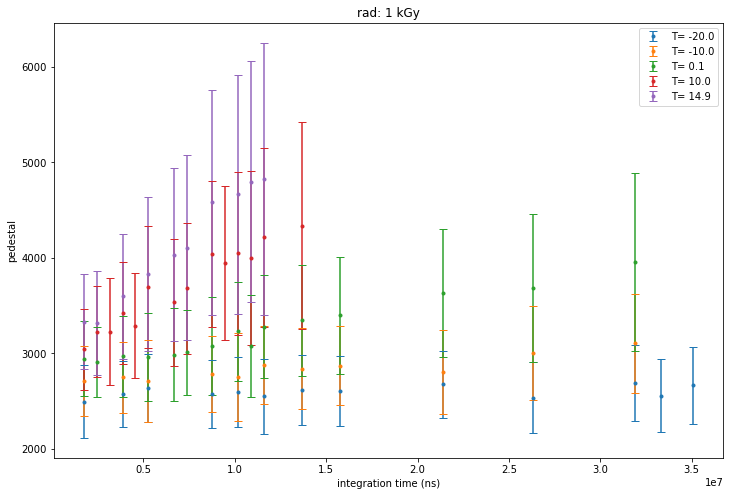

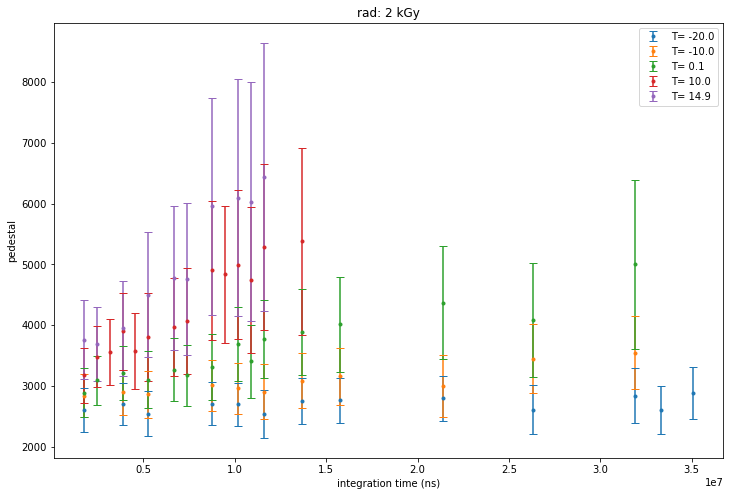

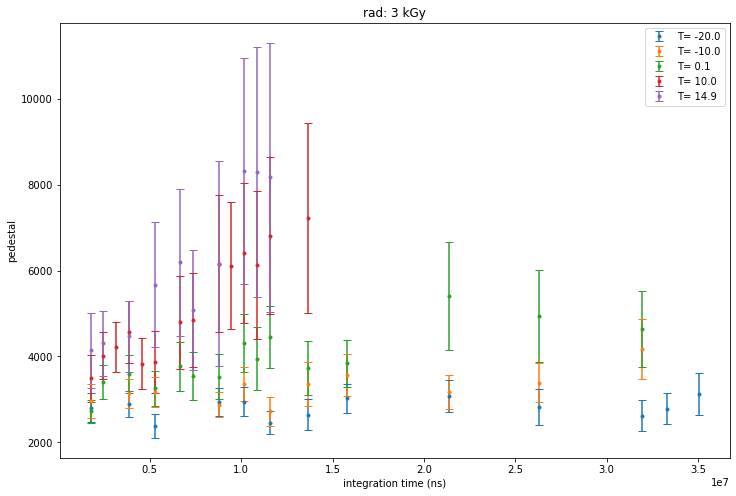

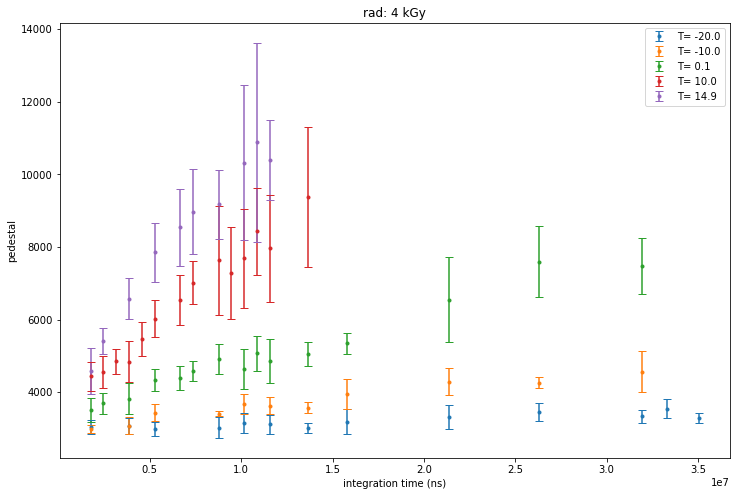

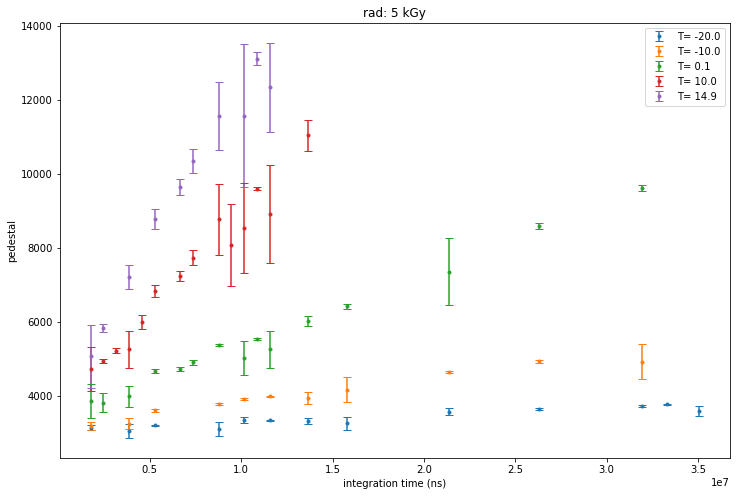

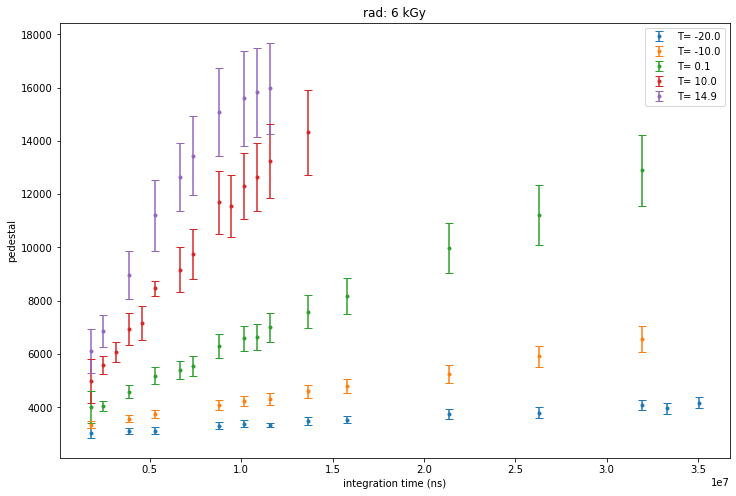

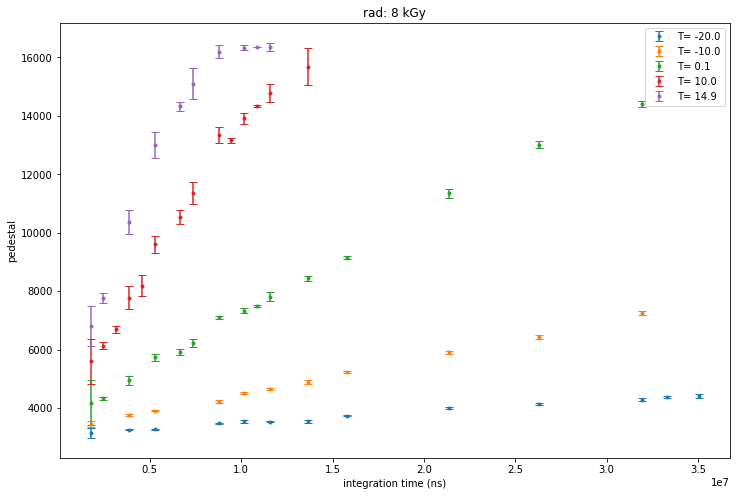

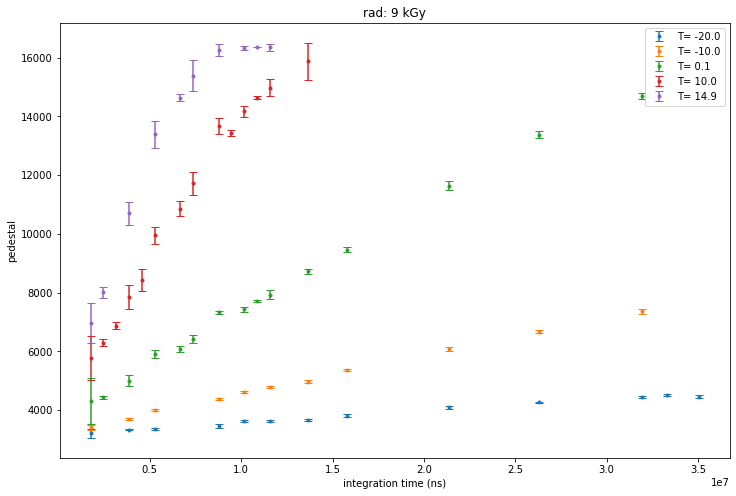

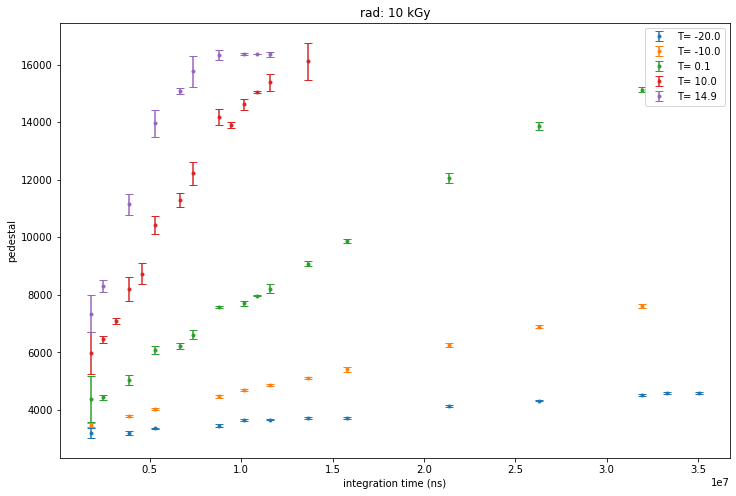

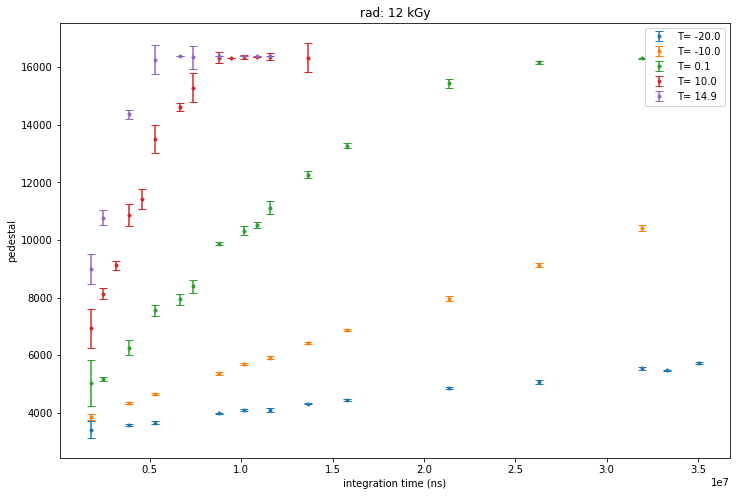

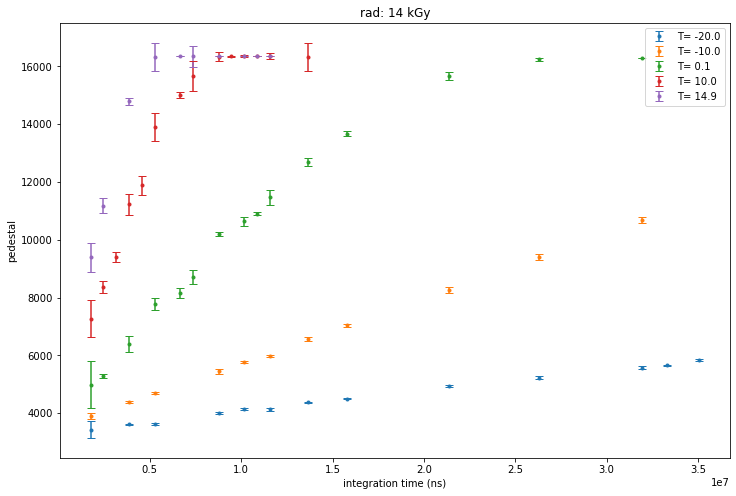

In [238]:
for r in np.unique(rads):
    plt.figure(figsize=(12,8))
    for t in np.unique(Temps):
        
        plt.errorbar(x=tints[np.argwhere(rads==r)][np.where(Temps[np.argwhere(rads==r)]==t)[0]], 
                 y=intensities[np.argwhere(rads==r)][np.where(Temps[np.argwhere(rads==r)]==t)[0]],
                     yerr = errors[np.argwhere(rads==r)][np.where(Temps[np.argwhere(rads==r)]==t)[0]],
                 markersize=3,capsize=4, fmt='o',
                label = 'T= {}'.format(t))
        plt.title('rad: {} kGy'.format(r))
        plt.xlabel('integration time (ns)')
        plt.ylabel('pedestal')
        #plt.ylim(0,3500)
    plt.legend(loc='upper right')
    #plt.show()
    plt.savefig('pedestal_w_noise_vs_tint_5_temperatures_{}kGy.png'.format(r))